In [1]:
from icecube import icetray, dataio, dataclasses, simclasses, clsim
from icecube.icetray import I3Units, OMKey, I3Frame
from I3Tray import *
from icecube.dataclasses import ModuleKey
import numpy as np
from scipy import stats
from iminuit import minimize
from likelihoodHelpers import log_likelihood_biGauss, log_likelihood_doublePeak
from likelihoodHelpers import likelihood_ratio_doublePeak, likelihood_ratio_biGauss, biGauss, double_peak
import scipy, csv
import curveFit
import matplotlib.pyplot as plt

loaded geometry
Now Histogramming
Now Histogramming
Now Histogramming


likelihoodHelpers.py:116: RuntimeWarning: divide by zero encountered in divide
  val = model - n + (n*np.log(n/model))
likelihoodHelpers.py:116: RuntimeWarning: divide by zero encountered in log
  val = model - n + (n*np.log(n/model))
likelihoodHelpers.py:116: RuntimeWarning: invalid value encountered in multiply
  val = model - n + (n*np.log(n/model))
likelihoodHelpers.py:109: RuntimeWarning: divide by zero encountered in log
  val = model - n + (n*np.log(n/model))
likelihoodHelpers.py:109: RuntimeWarning: invalid value encountered in multiply
  val = model - n + (n*np.log(n/model))


Now Histogramming
Now Histogramming
Now Histogramming
Now Histogramming
Now Histogramming
Now Histogramming
Now Histogramming
Now Histogramming
Now Histogramming
Now Histogramming
Now Histogramming


likelihoodHelpers.py:116: RuntimeWarning: invalid value encountered in divide
  val = model - n + (n*np.log(n/model))
likelihoodHelpers.py:109: RuntimeWarning: divide by zero encountered in divide
  val = model - n + (n*np.log(n/model))
likelihoodHelpers.py:109: RuntimeWarning: invalid value encountered in divide
  val = model - n + (n*np.log(n/model))


Now Histogramming
Now Histogramming
Now Histogramming
('Frame number - 17', 'String number - 9', 'DOM number - 16')
Now Histogramming
bounds on single peak
╒══════════╤══════════╕
│ -30.9956 │  32.0044 │
├──────────┼──────────┤
│   1      │  63      │
├──────────┼──────────┤
│   1      │  20      │
├──────────┼──────────┤
│   1      │ 350      │
╘══════════╧══════════╛
╒══════════════╤═══════╤═════╤═══════╤══════════════════╕
│          pos │   wid │   k │   amp │   log likelihood │
╞══════════════╪═══════╪═════╪═══════╪══════════════════╡
│ -2.49401e-12 │  31.5 │   5 │   175 │         -6595.54 │
╘══════════════╧═══════╧═════╧═══════╧══════════════════╛
╒═══════════╤═══════╤═════╤═══════╤══════════════════╕
│       pos │   wid │   k │   amp │   log likelihood │
╞═══════════╪═══════╪═════╪═══════╪══════════════════╡
│ 0.0396648 │  31.5 │   5 │   175 │         -6595.87 │
╘═══════════╧═══════╧═════╧═══════╧══════════════════╛
╒═══════════╤═══════╤═════╤═══════╤══════════════════╕
│       

╒══════════╤═════════╤═════════╤═════════╤══════════════════╕
│      pos │     wid │       k │     amp │   log likelihood │
╞══════════╪═════════╪═════════╪═════════╪══════════════════╡
│ -29.7209 │ 29.2817 │ 1.00937 │ 147.172 │         -7237.04 │
╘══════════╧═════════╧═════════╧═════════╧══════════════════╛
╒══════════╤═════════╤═════════╤═════════╤══════════════════╕
│      pos │     wid │       k │     amp │   log likelihood │
╞══════════╪═════════╪═════════╪═════════╪══════════════════╡
│ -29.7209 │ 29.2817 │ 1.00553 │ 147.172 │         -7236.35 │
╘══════════╧═════════╧═════════╧═════════╧══════════════════╛
╒══════════╤═════════╤═════════╤═════════╤══════════════════╕
│      pos │     wid │       k │     amp │   log likelihood │
╞══════════╪═════════╪═════════╪═════════╪══════════════════╡
│ -29.7209 │ 29.2817 │ 1.00653 │ 147.172 │         -7236.53 │
╘══════════╧═════════╧═════════╧═════════╧══════════════════╛
╒══════════╤═════════╤═════════╤═════════╤══════════════════╕
│      p

╒══════════╤═════════╤═════════╤═════════╤══════════════════╕
│      pos │     wid │       k │     amp │   log likelihood │
╞══════════╪═════════╪═════════╪═════════╪══════════════════╡
│ -21.1194 │ 18.4869 │ 1.00012 │ 205.131 │         -7291.46 │
╘══════════╧═════════╧═════════╧═════════╧══════════════════╛
╒══════════╤═════════╤═════════╤═════════╤══════════════════╕
│      pos │     wid │       k │     amp │   log likelihood │
╞══════════╪═════════╪═════════╪═════════╪══════════════════╡
│ -21.1194 │ 18.4869 │ 1.00072 │ 205.131 │         -7291.44 │
╘══════════╧═════════╧═════════╧═════════╧══════════════════╛
╒══════════╤═════════╤═════════╤═════════╤══════════════════╕
│      pos │     wid │       k │     amp │   log likelihood │
╞══════════╪═════════╪═════════╪═════════╪══════════════════╡
│ -21.1194 │ 18.4869 │ 1.00035 │ 205.399 │         -7291.44 │
╘══════════╧═════════╧═════════╧═════════╧══════════════════╛
╒══════════╤═════════╤═════════╤═════════╤══════════════════╕
│      p

╒══════════╤═════════╤════════╤════════╤══════════════╤════════╤═════════╤════════╤══════════════════╕
│     pos1 │    wid1 │     k1 │   amp1 │         pos2 │   wid2 │      k2 │   amp2 │   log likelihood │
╞══════════╪═════════╪════════╪════════╪══════════════╪════════╪═════════╪════════╪══════════════════╡
│ -6.00013 │ 1.11803 │ 1.0284 │    175 │ -2.49223e-12 │   31.5 │ 3.39638 │    175 │         -6620.17 │
╘══════════╧═════════╧════════╧════════╧══════════════╧════════╧═════════╧════════╧══════════════════╛
╒══════════╤═════════╤════════╤════════╤══════════════╤════════╤═════════╤════════╤══════════════════╕
│     pos1 │    wid1 │     k1 │   amp1 │         pos2 │   wid2 │      k2 │   amp2 │   log likelihood │
╞══════════╪═════════╪════════╪════════╪══════════════╪════════╪═════════╪════════╪══════════════════╡
│ -6.00013 │ 1.11803 │ 1.0284 │    175 │ -2.49223e-12 │   31.5 │ 1.34843 │    175 │         -6892.63 │
╘══════════╧═════════╧════════╧════════╧══════════════╧════════╧═════════

╒════════╤═════════╤═════════╤═════════╤══════════╤═════════╤═════════╤═════════╤══════════════════╕
│   pos1 │    wid1 │      k1 │    amp1 │     pos2 │    wid2 │      k2 │    amp2 │   log likelihood │
╞════════╪═════════╪═════════╪═════════╪══════════╪═════════╪═════════╪═════════╪══════════════════╡
│     -6 │ 1.00023 │ 1.00095 │ 1.15442 │ -5.98713 │ 62.9969 │ 1.00001 │ 171.884 │         -7120.37 │
╘════════╧═════════╧═════════╧═════════╧══════════╧═════════╧═════════╧═════════╧══════════════════╛
╒════════╤═════════╤═════════╤═════════╤══════════╤═════════╤═════════╤═════════╤══════════════════╕
│   pos1 │    wid1 │      k1 │    amp1 │     pos2 │    wid2 │      k2 │    amp2 │   log likelihood │
╞════════╪═════════╪═════════╪═════════╪══════════╪═════════╪═════════╪═════════╪══════════════════╡
│     -6 │ 1.00023 │ 1.00095 │ 1.09888 │ -5.99257 │ 62.9969 │ 1.00001 │ 171.884 │         -7120.39 │
╘════════╧═════════╧═════════╧═════════╧══════════╧═════════╧═════════╧═════════╧══════════

Now Histogramming


likelihoodHelpers.py:109: RuntimeWarning: overflow encountered in divide
  val = model - n + (n*np.log(n/model))


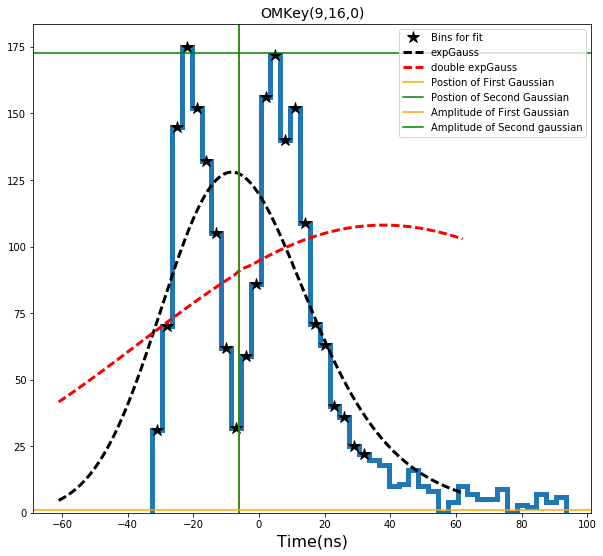

In [2]:
'''
Loading Geometry
'''

gcd_file = '/home/users/akatil/P-ONE/GCD_files/PONE_Phase1.i3.gz'
gcd = dataio.I3File(gcd_file)
cframe = gcd.pop_frame()
geometry = cframe["I3Geometry"]
omgeo = geometry.omgeo
print('loaded geometry')

infile = '/data/p-one/akatil/step_5_medium_water/NuTau_NuE_20Events/step_5_785_medium_water_custom_mDOM_recoPulse.i3.gz'

tray = I3Tray()

tray.AddModule('I3Reader', 'reader',
            FilenameList = [gcd_file, infile]
            )

tray.AddModule(curveFit.curveFit, "Double Peak Selector",
               omgeo = omgeo,
               InputMCPETree = "I3RecoPulses",
               OutputMCPETree = "Parameters",
               FrameList = [17],
               StringList = [9],
               DOMList = [16])

tray.AddModule("TrashCan","adios")
tray.Execute()
tray.Finish()

In [6]:
initial_biGauss = np.array([10, 20, 5, 200])
initial_biGauss2 = np.array([10, 20, 5, 200])
initial_guesses = np.append(initial_biGauss, initial_biGauss2)

In [7]:
initial_guesses

array([ 10,  20,   5, 200,  10,  20,   5, 200])

In [ ]:
'''
        # Check if I want to debug this frame
        debug_mode = False
        if len(self.debug) > 0:
            if self.debug[0] == 'all':
                debug_mode = True
            if self.frame_counter in self.debug:
                debug_mode = True
                print('Debugging frame ', self.frame_counter)
        # Increase the frame counter

        '''